<a href="https://colab.research.google.com/github/yezzzzin/LIEON_preprocessing/blob/main/VSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install -y libyaml-dev
!apt-get install -y ffmpeg
!apt-get install -y sox
!apt-get install -y bc
!apt-get install -y libsndfile1
!apt-get install -y libsm6 libxext6 libxrender-dev
!pip install openSMILE

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Suggested packages:
  libyaml-doc
The following NEW packages will be installed:
  libyaml-dev
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 62.8 kB of archives.
After this operation, 257 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libyaml-dev amd64 0.2.2-1build2 [62.8 kB]
Fetched 62.8 kB in 1s (83.1 kB/s)
Selecting previously unselected package libyaml-dev:amd64.
(Reading database ... 121752 files and directories currently installed.)
Preparing to unpack .../libyaml-dev_0.2.2-1build2_amd64.deb ...
Unpacking libyaml-dev:amd64 (0.2.2-1build2) ...
Setting up libyaml-dev:amd64 (0.2.2-1build2) ...
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upg

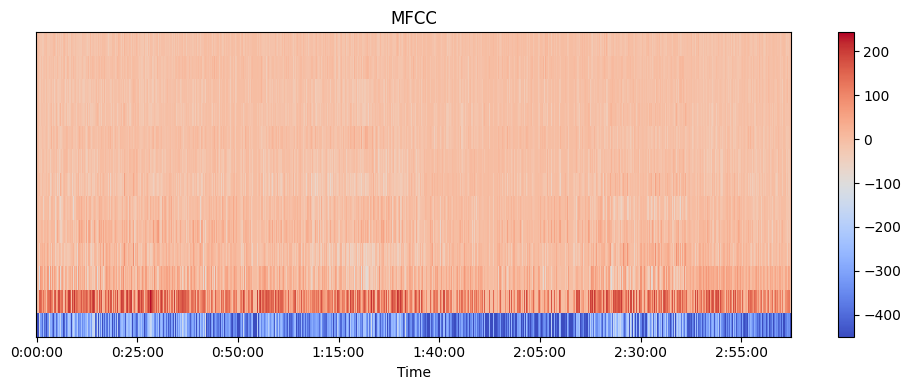

<ipython-input-2-9de6f1d47b30>:85: UserWarning: Glyph 54532 (\N{HANGUL SYLLABLE PEU}) missing from current font.
  plt.tight_layout()
<ipython-input-2-9de6f1d47b30>:85: UserWarning: Glyph 47112 (\N{HANGUL SYLLABLE RE}) missing from current font.
  plt.tight_layout()
<ipython-input-2-9de6f1d47b30>:85: UserWarning: Glyph 51076 (\N{HANGUL SYLLABLE IM}) missing from current font.
  plt.tight_layout()
<ipython-input-2-9de6f1d47b30>:85: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  plt.tight_layout()
<ipython-input-2-9de6f1d47b30>:85: UserWarning: Glyph 51669 (\N{HANGUL SYLLABLE JING}) missing from current font.
  plt.tight_layout()
<ipython-input-2-9de6f1d47b30>:85: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/u

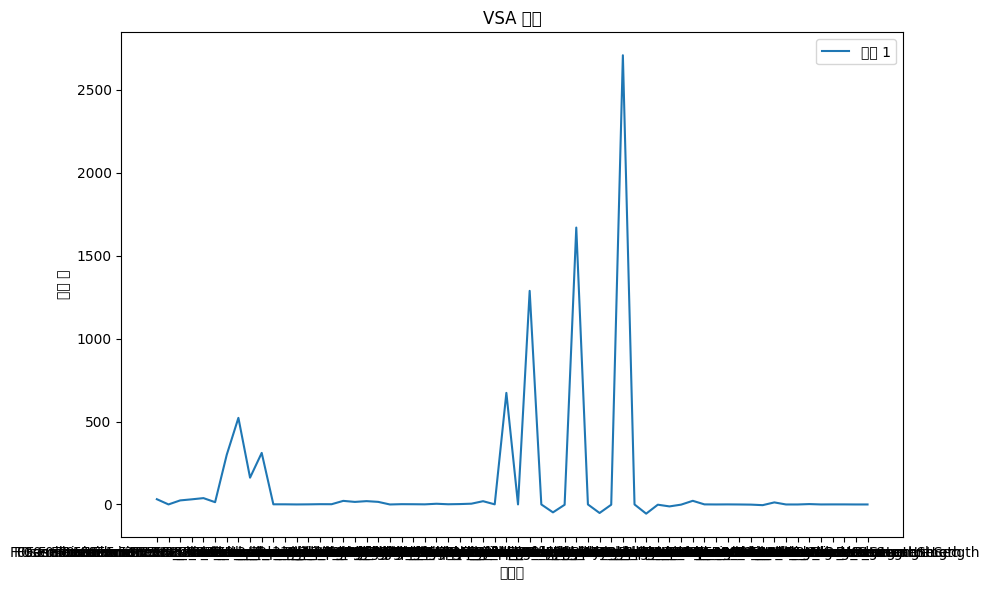

MFCC 특징:
[-335.72736      95.6799       11.909177     -0.49469492    4.2133927
   -2.918042     -9.776455     -8.377133     -5.146892     -8.817188
   -9.257067     -6.1804733    -8.232683  ]
VSA 특징:
                                  F0semitoneFrom27.5Hz_sma3nz_amean  \
start  end                                                            
0 days 0 days 01:33:42.757729167                          31.832243   

                                  F0semitoneFrom27.5Hz_sma3nz_stddevNorm  \
start  end                                                                 
0 days 0 days 01:33:42.757729167                                0.271166   

                                  F0semitoneFrom27.5Hz_sma3nz_percentile20.0  \
start  end                                                                     
0 days 0 days 01:33:42.757729167                                   24.521471   

                                  F0semitoneFrom27.5Hz_sma3nz_percentile50.0  \
start  end                          

In [ ]:
import librosa
import librosa.display
import numpy as np
import opensmile
import matplotlib.pyplot as plt
import pywt

# opensmile 라이브러리 초기화
smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.GeMAPSv01b,
    feature_level=opensmile.FeatureLevel.Functionals
)

# Wavelet 변환을 사용하여 잡음 제거
def denoise_wavelet(y):
    # Wavelet 변환
    coeffs = pywt.wavedec(y, 'db4', level=6)

    # 잡음 제거를 위해 threshold 계산
    threshold = np.std(coeffs[-1]) * np.sqrt(2 * np.log(len(y)))

    # VisuShrink 알고리즘을 사용하여 잡음 제거
    coeffs = [pywt.threshold(c, threshold, mode='soft') for c in coeffs]

    # 잡음이 제거된 신호로 재구성
    clean_y = pywt.waverec(coeffs, 'db4')

    return clean_y

# MFCC 추출 및 시각화
def extract_mfcc_features(audio_path, sr=44100, n_mfcc=13):
    # Load audio file
    y, sr = librosa.load(audio_path, sr=sr)

    # 잡음 제거
    clean_y = denoise_wavelet(y)

    # Extract MFCC features from denoised signal
    mfccs = librosa.feature.mfcc(y=clean_y, sr=sr, n_mfcc=n_mfcc)

    # Visualize MFCC
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfccs, x_axis='time')
    plt.colorbar()
    plt.title('MFCC')
    plt.tight_layout()
    plt.show()

    # Mean of MFCC features
    mfccs_mean = np.mean(mfccs, axis=1)

    return mfccs_mean

# VSA 특징 추출
def extract_vsa_features(audio_path):
    smile = opensmile.Smile(
        feature_set=opensmile.FeatureSet.GeMAPSv01b,
        feature_level=opensmile.FeatureLevel.Functionals
    )

    # Load audio signal
    y, sr = librosa.load(audio_path, sr=None)

    # Process audio signal to extract VSA features
    features = smile.process_signal(y, sr)

    return features

# 음성 파일 경로
audio_file = '/content/drive/MyDrive/보이스피싱 데이터(앞뒤 자르기만 하고 다 합친 것)/보이스피싱 데이터 머지 파일.wav'

# MFCC 특징 추출 및 시각화
mfcc_features = extract_mfcc_features(audio_file)

# VSA 특징 추출
vsa_features = extract_vsa_features(audio_file)

# VSA 특징 시각화
plt.figure(figsize=(10, 6))
plt.plot(vsa_features.T)
plt.title('VSA 특징')
plt.xlabel('프레임')
plt.ylabel('특징 값')
plt.legend([f'특징 {i+1}' for i in range(vsa_features.shape[1])])
plt.tight_layout()
plt.show()

print("MFCC 특징:")
print(mfcc_features)

print("VSA 특징:")
print(vsa_features)

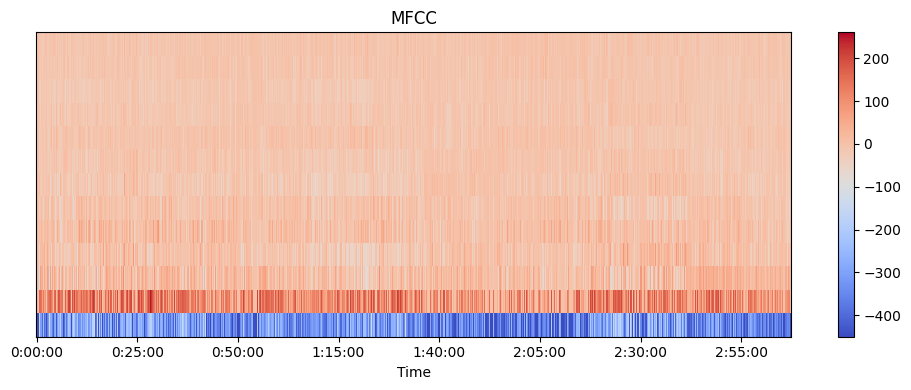

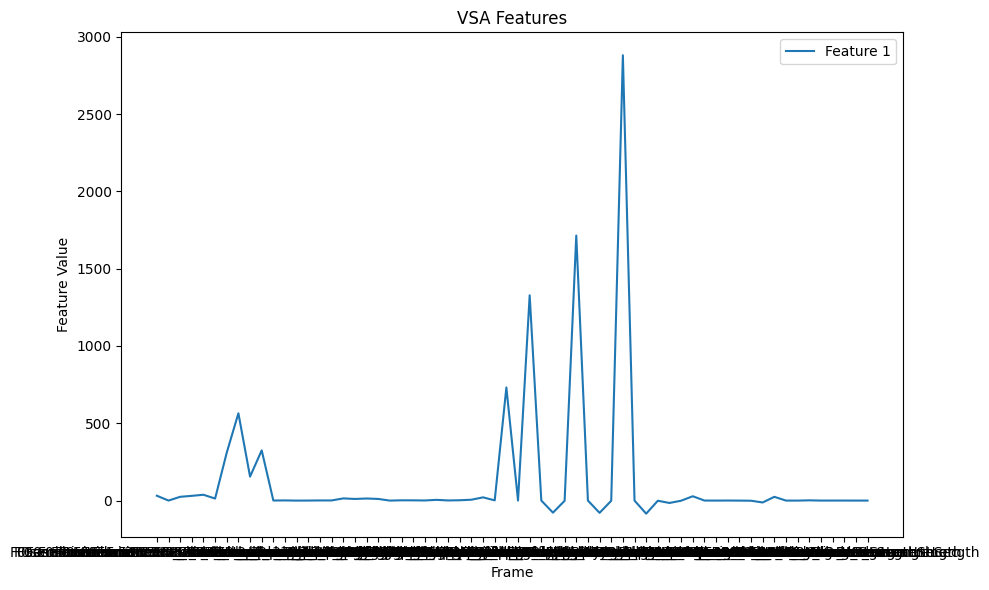

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
import librosa
import librosa.display
import numpy as np
import opensmile
import matplotlib.pyplot as plt
import csv
import pywt  # pywt 라이브러리 추가

# Wavelet 변환을 사용하여 잡음 제거
def denoise_wavelet(y):
    # Wavelet 변환
    coeffs = pywt.wavedec(y, 'db4', level=6)

    # 잡음 제거를 위해 threshold 계산
    threshold = np.std(coeffs[-1]) * np.sqrt(2 * np.log(len(y)))

    # VisuShrink 알고리즘을 사용하여 잡음 제거
    coeffs = [pywt.threshold(c, threshold, mode='soft') for c in coeffs]

    # 잡음이 제거된 신호로 재구성
    clean_y = pywt.waverec(coeffs, 'db4')

    return clean_y

# VSA 특징 추출
def extract_vsa_features(audio_path, smile):
    # Load audio file
    y, sr = librosa.load(audio_path)

    # 잡음 제거
    clean_y = denoise_wavelet(y)

    # Extract VSA features using OpenSMILE
    vsa_features = smile.process_signal(clean_y, sr)

    return vsa_features

# MFCC 특징 추출 및 시각화
def extract_mfcc_features(audio_path, sr=44100, n_mfcc=13):
    # Load audio file
    y, sr = librosa.load(audio_path, sr=sr)

    # Extract MFCC features
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)

    # Visualize MFCC
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfccs, x_axis='time')
    plt.colorbar()
    plt.title('MFCC')
    plt.tight_layout()
    plt.show()

    return mfccs

# 음성 파일 경로
audio_file = '/content/drive/MyDrive/보이스피싱 데이터(앞뒤 자르기만 하고 다 합친 것)/보이스피싱 데이터 머지 파일.wav'

# opensmile 라이브러리 초기화
smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.GeMAPSv01b,
    feature_level=opensmile.FeatureLevel.Functionals
)

# MFCC 특징 추출 및 시각화
mfcc_features = extract_mfcc_features(audio_file)

# VSA 특징 추출
vsa_features = extract_vsa_features(audio_file, smile)

# VSA 특징 시각화
plt.figure(figsize=(10, 6))
plt.plot(vsa_features.T)
plt.title('VSA Features')
plt.xlabel('Frame')
plt.ylabel('Feature Value')
plt.legend([f'Feature {i+1}' for i in range(vsa_features.shape[1])])
plt.tight_layout()
plt.show()

# VSA 특징을 기반으로 라벨링
vsa_threshold = 0.5  # 임계값 설정
if vsa_features.mean() > vsa_threshold:
    vsa_label = 1  # 거짓
else:
    vsa_label = 0  # 진실

# CSV 파일로 저장
with open('features.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["MFCC" + str(i+1) for i in range(mfcc_features.shape[1])] + ["VSA" + str(i+1) for i in range(vsa_features.shape[1])] + ["Label"])
    writer.writerow(np.concatenate([mfcc_features.flatten(), vsa_features.flatten(), [vsa_label]]))